In [103]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
WORK_DIR="drive/My Drive"
os.chdir(WORK_DIR)

I will take the data from Machine Learning Summer Training Hackathon.
Steps:


1.   Univariate analisys of features. Check for normal distribution and outliers
2.   Bivariate analisys of features. Check for correlation between features and target variables
3.   Check for Correlation matrix
4.   Feature Imputing for 'education'
5.   Feature Engineering
     High correlation between:
     * asset_cost and loan_amount -> 74%
     * no_of_curr_loans and no_of_loans -> 77%
      I will create two new features to avoid high  
     correlation.

     * create a column, which will store an information     
       about having loans before and drop no_of_loans
     * create column loan_amount-asset_cost, which tells  
      about asset value without loan amount disbursed
6.   Feature Scaling for numerical features
7.   One hot encoding for 'proof_submitted'
8.   Label Encoding for 'education'
9.   Modelling.
     * Logistic regression
     * Decision Tree
     * SVC
     * KNN
     * XGBOOST
     * Random forest
     I choose Random Forest Classifier
     Final model on test set has macro f1_score=0.524564









In [4]:
#Libraries i will use

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.svm import LinearSVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
%matplotlib inline

In [104]:
#my train data
train_df=pd.read_csv('train_LZV4RXX.csv')

In [105]:
#my test data
test_df=pd.read_csv('test_4zJg83n.csv')

In [7]:
#quick view 
train_df.head()

,loan_id,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
0,1,27,1.0,Aadhar,504264,820920,2,2,0,0
1,2,48,1.0,Aadhar,728556,831444,6,2,0,0
2,3,30,2.0,VoterID,642936,826092,0,0,0,1
3,4,28,1.0,Aadhar,746556,930924,0,0,0,0
4,5,29,1.0,Aadhar,1139880,1902000,0,0,0,0


 Univariate Analysis

In [8]:
#check columns
train_df.columns

Index(['loan_id', 'age', 'education', 'proof_submitted', 'loan_amount',
       'asset_cost', 'no_of_loans', 'no_of_curr_loans', 'last_delinq_none',
       'loan_default'],
      dtype='object')

In [9]:
#check columns
test_df.columns

Index(['loan_id', 'age', 'education', 'proof_submitted', 'loan_amount',
       'asset_cost', 'no_of_loans', 'no_of_curr_loans', 'last_delinq_none'],
      dtype='object')

In [10]:
#shapes
train_df.shape, test_df.shape

((7000, 10), (3000, 9))

In [11]:
#statistics
train_df.describe()

,loan_id,age,education,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
count,7000.000000,7000.000000,6755.000000,7.000000e+03,7.000000e+03,7000.000000,7000.000000,7000.000000,7000.000000
mean,3500.500000,36.096571,1.561954,6.633552e+05,9.162998e+05,2.853286,1.371143,0.013286,0.400000
std,2020.870275,7.587700,0.496184,1.498128e+05,2.144922e+05,5.471932,2.189278,0.114504,0.489933
min,1.000000,21.000000,1.000000,1.678800e+05,4.733520e+05,0.000000,0.000000,0.000000,0.000000
25%,1750.750000,29.000000,1.000000,5.777880e+05,7.979010e+05,0.000000,0.000000,0.000000,0.000000
50%,3500.500000,36.000000,2.000000,6.571080e+05,8.584260e+05,0.000000,0.000000,0.000000,0.000000
75%,5250.250000,43.000000,2.000000,7.373640e+05,9.576750e+05,3.000000,2.000000,0.000000,1.000000
max,7000.000000,50.000000,2.000000,1.781376e+06,2.419200e+06,109.000000,33.000000,1.000000,1.000000


In [12]:
#quick look at target value
train_df['loan_default'].value_counts(normalize=True)

0    0.6
1    0.4
Name: loan_default, dtype: float64

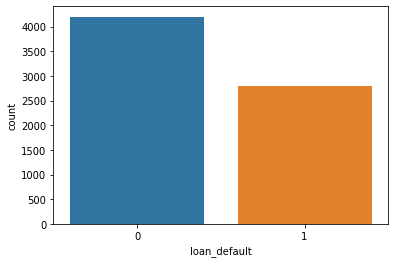

In [13]:
ax = sns.countplot(x="loan_default", data=train_df)


In [14]:
#check percentage of proof_submitted types
train_df['proof_submitted'].value_counts(normalize=True)

Aadhar      0.847286
VoterID     0.101000
PAN         0.033571
Driving     0.016286
Passport    0.001857
Name: proof_submitted, dtype: float64

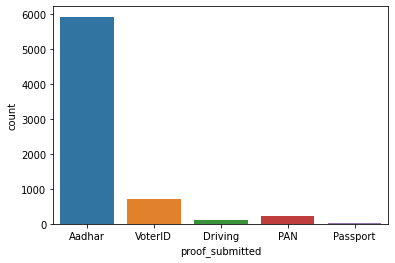

In [15]:
#countplot for check types
ax=sns.countplot(x='proof_submitted', data=train_df)

In [16]:
# percentage of education types
train_df['education'].value_counts(normalize=True)

2.0    0.561954
1.0    0.438046
Name: education, dtype: float64

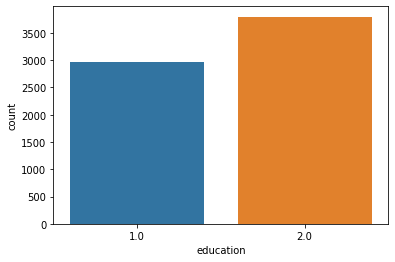

In [17]:
#count plot types of education
ax=sns.countplot(x='education', data=train_df)

In [18]:
#check percentage of 0/1 in last_delinq_none column
train_df['last_delinq_none'].value_counts(normalize=True)

0    0.986714
1    0.013286
Name: last_delinq_none, dtype: float64

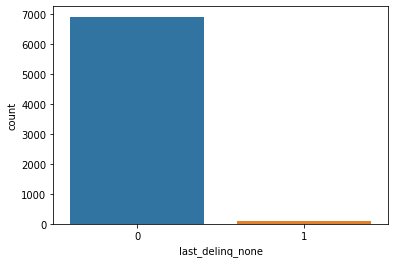

In [19]:
#distribution of 0/1 
ax=sns.countplot(x='last_delinq_none', data=train_df)

It can be inferred from the above bar plots that:

*   Around 85% of 'proof_submitted' are Aadhar
*   Around 10% of 'proof_submitted' are Aadhar
*   PAN, Driving, Passport together are around 5% of 'proof_submitted'


*   Around 56% of 'education' in the dataset are 2.0
*   Around 44% of 'education' in the dataset are 1.0


*   Around 99% of applicants has no the loan defaulted in at least one of the past loans
*   Just 1% of applicants has the loan defaulted in at least one of the past loans








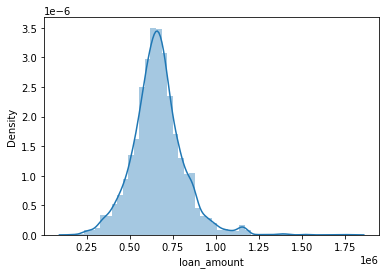

In [20]:
# check for normal distribution
ax=sns.distplot(train_df['loan_amount'])


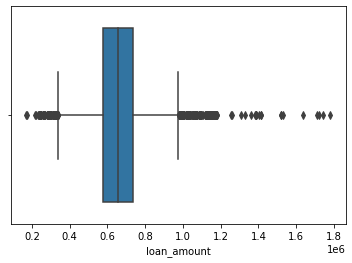

In [21]:
#check outliers
ax=sns.boxplot(train_df['loan_amount'])

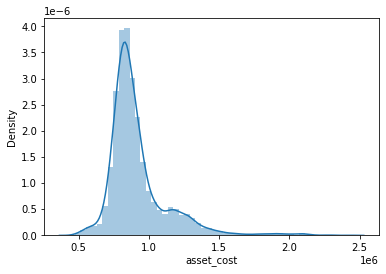

In [22]:
# check for normal distribution
ax=sns.distplot(train_df['asset_cost'])


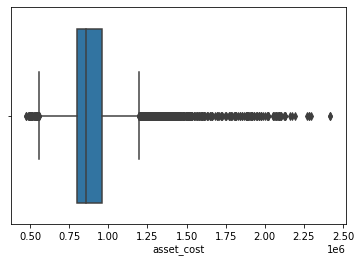

In [23]:
#check outliers
ax=sns.boxplot(train_df['asset_cost'])


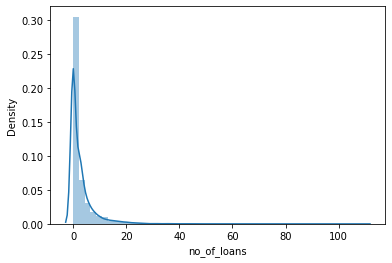

In [24]:
# check for normal distribution
ax=sns.distplot(train_df['no_of_loans'])

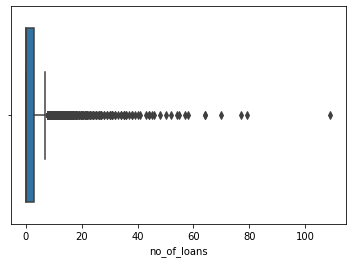

In [25]:
#check outliers
ax=sns.boxplot(train_df['no_of_loans'])

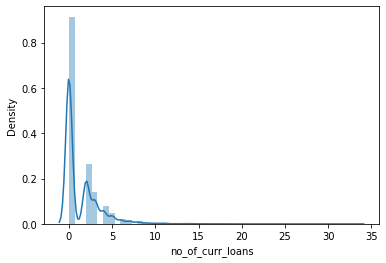

In [26]:
# check for normal distribution
ax=sns.distplot(train_df['no_of_curr_loans'])

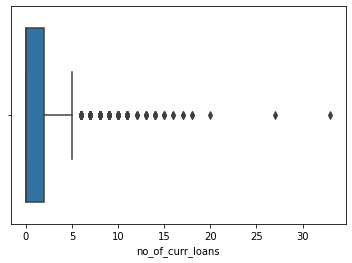

In [27]:
#check outliers
ax=sns.boxplot(train_df['no_of_curr_loans'])

Bivariate Analysis...
Check for correlation between features and target variables

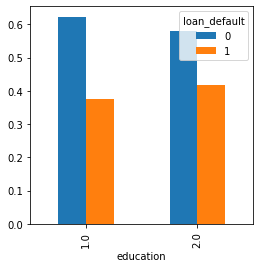

In [28]:
ed=pd.crosstab(train_df['education'],train_df['loan_default']) 
ed.div(ed.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4))

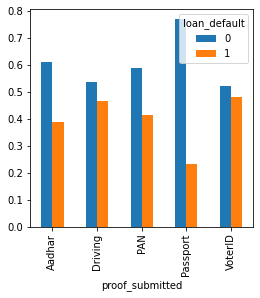

In [29]:
ps=pd.crosstab(train_df['proof_submitted'],train_df['loan_default']) 
ps.div(ps.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4))

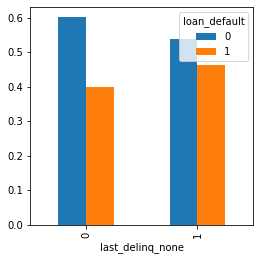

In [30]:
ldn=pd.crosstab(train_df['last_delinq_none'],train_df['loan_default']) 
ldn.div(ldn.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4))

'loan_default' is correlated with 'loan_amount' best

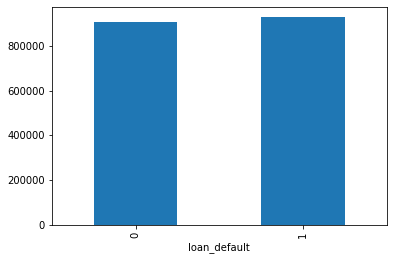

In [31]:
train_df.groupby('loan_default')['asset_cost'].mean().plot.bar()

In [32]:
train_df.head()

,loan_id,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
0,1,27,1.0,Aadhar,504264,820920,2,2,0,0
1,2,48,1.0,Aadhar,728556,831444,6,2,0,0
2,3,30,2.0,VoterID,642936,826092,0,0,0,1
3,4,28,1.0,Aadhar,746556,930924,0,0,0,0
4,5,29,1.0,Aadhar,1139880,1902000,0,0,0,0


In [33]:
#correlation matrix
corr = train_df.corr()
corr.style.background_gradient(cmap='coolwarm')


,loan_id,age,education,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
loan_id,1.000000,-0.017165,-0.034615,-0.020757,-0.032053,-0.023589,-0.015454,-0.002829,0.011921
age,-0.017165,1.000000,0.102063,-0.058011,-0.122741,0.193026,0.184503,0.050325,-0.029571
education,-0.034615,0.102063,1.000000,-0.004588,0.083221,0.025889,0.004606,0.026516,0.041701
loan_amount,-0.020757,-0.058011,-0.004588,1.000000,0.735176,0.010867,0.014788,-0.009412,0.115736
asset_cost,-0.032053,-0.122741,0.083221,0.735176,1.000000,-0.052643,-0.054021,-0.023489,0.048020
no_of_loans,-0.023589,0.193026,0.025889,0.010867,-0.052643,1.000000,0.774705,0.235024,-0.045738
no_of_curr_loans,-0.015454,0.184503,0.004606,0.014788,-0.054021,0.774705,1.000000,0.272716,-0.057306
last_delinq_none,-0.002829,0.050325,0.026516,-0.009412,-0.023489,0.235024,0.272716,1.000000,0.014772
loan_default,0.011921,-0.029571,0.041701,0.115736,0.048020,-0.045738,-0.057306,0.014772,1.000000


In [34]:
train_df.isnull().sum()

loan_id               0
age                   0
education           245
proof_submitted       0
loan_amount           0
asset_cost            0
no_of_loans           0
no_of_curr_loans      0
last_delinq_none      0
loan_default          0
dtype: int64

In [35]:
train_df.columns

Index(['loan_id', 'age', 'education', 'proof_submitted', 'loan_amount',
       'asset_cost', 'no_of_loans', 'no_of_curr_loans', 'last_delinq_none',
       'loan_default'],
      dtype='object')

In [36]:
train_df.dtypes

loan_id               int64
age                   int64
education           float64
proof_submitted      object
loan_amount           int64
asset_cost            int64
no_of_loans           int64
no_of_curr_loans      int64
last_delinq_none      int64
loan_default          int64
dtype: object

In [37]:
train_df.head()

,loan_id,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
0,1,27,1.0,Aadhar,504264,820920,2,2,0,0
1,2,48,1.0,Aadhar,728556,831444,6,2,0,0
2,3,30,2.0,VoterID,642936,826092,0,0,0,1
3,4,28,1.0,Aadhar,746556,930924,0,0,0,0
4,5,29,1.0,Aadhar,1139880,1902000,0,0,0,0


In [38]:
train_df['education'].count()

6755

In [39]:
train_df['education'].unique()

array([ 1.,  2., nan])

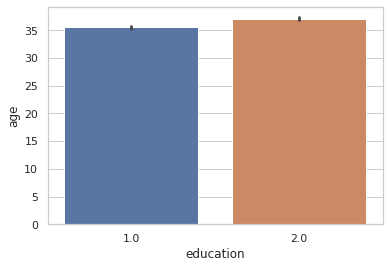

In [40]:
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="education", y="age", data=train_df)


In [41]:
train_df['age'].unique()

array([27, 48, 30, 28, 29, 34, 46, 32, 36, 25, 38, 40, 41, 44, 47, 33, 42,
       26, 45, 37, 31, 43, 49, 35, 24, 50, 39, 23, 22, 21])

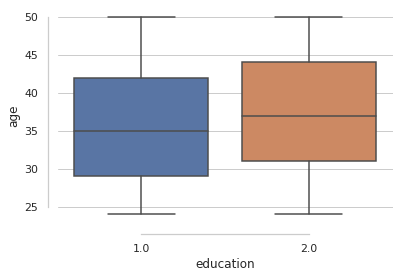

In [42]:
sns.boxplot(x="education", y="age", data=train_df)
sns.despine(offset=10, trim=True)

In [43]:
train_df.groupby( [ "education", "age"] ).count()

loan_id  proof_submitted  loan_amount  asset_cost  no_of_loans  \
education age                                                                   
1.0       24        28               28           28          28           28   
          25       145              145          145         145          145   
          26       176              176          176         176          176   
          27       167              167          167         167          167   
          28       163              163          163         163          163   
          29       162              162          162         162          162   
          30       128              128          128         128          128   
          31       122              122          122         122          122   
          32       132              132          132         132          132   
          33       127              127          127         127          127   
          34       120              120          120         120          120   
          35       115              115          115         115          115   
          36        99               99           99          99           99   
          37       107              107          107         107          107   
          38       104              104          104         104          104   
          39       104              104          104         104          104   
          40        84               84           84          84           84   
          41        93               93           93          93           93   
          42        87               87           87          87           87   
          43        79               79           79          79           79   
          44        94               94           94          94           94   
          45       104              104          104         104          104   
          46       103              103          103         103          103   
          47       109              109          109         109          109   
          48       108              108          108         108          108   
          49        68               68           68          68           68   
          50        31               31           31          31           31   
2.0       24        33               33           33          33           33   
          25       111              111          111         111          111   
          26       142              142          142         142          142   
          27       128              128          128         128          128   
          28       172              172          172         172          172   
          29       160              160          160         160          160   
          30       152              152          152         152          152   
          31       154              154          154         154          154   
          32       151              151          151         151          151   
          33       153              153          153         153          153   
          34       156              156          156         156          156   
          35       153              153          153         153          153   
          36       163              163          163         163          163   
          37       168              168          168         168          168   
          38       139              139          139         139          139   
          39       125              125          125         125          125   
          40       154              154          154         154          154   
          41       135              135          135         135          135   
          42       158              158          158         158          158   
          43       139              139          139         139          139   
          44       143              143       

In [44]:
train_df.describe()

,loan_id,age,education,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
count,7000.000000,7000.000000,6755.000000,7.000000e+03,7.000000e+03,7000.000000,7000.000000,7000.000000,7000.000000
mean,3500.500000,36.096571,1.561954,6.633552e+05,9.162998e+05,2.853286,1.371143,0.013286,0.400000
std,2020.870275,7.587700,0.496184,1.498128e+05,2.144922e+05,5.471932,2.189278,0.114504,0.489933
min,1.000000,21.000000,1.000000,1.678800e+05,4.733520e+05,0.000000,0.000000,0.000000,0.000000
25%,1750.750000,29.000000,1.000000,5.777880e+05,7.979010e+05,0.000000,0.000000,0.000000,0.000000
50%,3500.500000,36.000000,2.000000,6.571080e+05,8.584260e+05,0.000000,0.000000,0.000000,0.000000
75%,5250.250000,43.000000,2.000000,7.373640e+05,9.576750e+05,3.000000,2.000000,0.000000,1.000000
max,7000.000000,50.000000,2.000000,1.781376e+06,2.419200e+06,109.000000,33.000000,1.000000,1.000000


Feature imputing

In [114]:
#find mode to fill nan values
mode_val=train_df['education'].mode()[0]
mode_val

2

In [137]:
train_rf=train_df

In [138]:
#crete new df to clean data
train_dfclean=train_df

In [139]:
#fill all nan values by mode
train_dfclean['education']=train_df['education'].fillna(value=mode_val)
train_rf['education']=train_df['education'].fillna(value=mode_val)

In [110]:
#check 
train_dfclean['education'].unique()

array([1., 2.])

In [50]:
#check datatypes
train_dfclean.dtypes

loan_id               int64
age                   int64
education           float64
proof_submitted      object
loan_amount           int64
asset_cost            int64
no_of_loans           int64
no_of_curr_loans      int64
last_delinq_none      int64
loan_default          int64
dtype: object

In [140]:
#change type of education
train_dfclean['education'] = train_dfclean['education'].astype(int)
train_rf['education']=train_rf['education'].astype(int)

In [119]:
#check unique values of 'proof_submitted'
train_dfclean['proof_submitted'].unique()

array(['Aadhar', 'VoterID', 'Driving', 'PAN', 'Passport'], dtype=object)

In [141]:
# Get one hot encoding of columns
one_hot = pd.get_dummies(train_dfclean['proof_submitted'])
train_dfclean = train_dfclean.drop('proof_submitted',axis = 1)
# Join the encoded df
train_dfclean = train_dfclean.join(one_hot)


# Get one hot encoding of columns
one_hot = pd.get_dummies(train_rf['proof_submitted'])
train_rf = train_rf.drop('proof_submitted',axis = 1)
# Join the encoded df
train_rf = train_rf.join(one_hot)

In [58]:
#check types in test df
test_df.dtypes

loan_id               int64
age                   int64
education           float64
proof_submitted      object
loan_amount           int64
asset_cost            int64
no_of_loans           int64
no_of_curr_loans      int64
last_delinq_none      int64
dtype: object

In [59]:
#check for test df
test_df['proof_submitted'].unique()

array(['Aadhar', 'VoterID', 'Driving', 'PAN', 'Passport'], dtype=object)

In [142]:
#create new test for cleaning data
test_dfclean=test_df
test_rf=test_df

In [143]:
#check mode for education in test df
mode_val=test_df['education'].mode()[0]
mode_val

test_dfclean['education']=test_df['education'].fillna(value=mode_val)
test_rf['education']=test_df['education'].fillna(value=mode_val)

In [144]:
#change the type of education
test_dfclean['education'] = test_dfclean['education'].astype(int)
test_rf['education'] = test_rf['education'].astype(int)

In [145]:
# Get one hot encoding of columns
one_hot = pd.get_dummies(test_dfclean['proof_submitted'])
test_dfclean = test_dfclean.drop('proof_submitted',axis = 1)
# Join the encoded df
test_dfclean = test_dfclean.join(one_hot)


# Get one hot encoding of columns
one_hot = pd.get_dummies(test_rf['proof_submitted'])
test_rf = test_rf.drop('proof_submitted',axis = 1)
# Join the encoded df
test_rf = test_rf.join(one_hot)

In [66]:
#check for new test df
test_dfclean.head()

,loan_id,age,education,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,Aadhar,Driving,PAN,Passport,VoterID
0,7001,29,1,636936,768240,2,2,0,1,0,0,0,0
1,7002,28,1,548988,693060,3,3,0,1,0,0,0,0
2,7003,28,1,651756,936600,0,0,0,1,0,0,0,0
3,7004,45,2,614676,744840,4,3,0,1,0,0,0,0
4,7005,48,1,625236,839400,0,0,0,1,0,0,0,0


In [73]:
#check for min in 'loan_amount'
train_dfclean['loan_amount'].min()

167880

In [74]:
#check for max in 'loan_amount'
train_dfclean['loan_amount'].max()

1781376

In [75]:
train_dfclean['asset_cost'].min()

473352

In [146]:
#normalize columns
num_cols=['loan_amount', 'asset_cost']
for i in num_cols:
    train_dfclean[i] = np.log(train_dfclean[i])




In [147]:
# numerical and categorical columns
num_cols=['age','loan_amount', 'asset_cost', 'no_of_loans', 'no_of_curr_loans']
cat_cols=['last_delinq_none', 'education']

In [148]:
#drop id 
train_dfclean=train_dfclean.drop('loan_id',axis=1) 
test_dfclean=test_dfclean.drop('loan_id',axis=1)

train_rf=train_rf.drop('loan_id',axis=1) 
test_rf=test_rf.drop('loan_id',axis=1)

In [149]:
#scaling numerical features
train_dfclean[num_cols] = MinMaxScaler().fit_transform(train_dfclean[num_cols])
test_dfclean[num_cols] = MinMaxScaler().fit_transform(test_dfclean[num_cols])

In [150]:
#encoding 'education' column 
le = LabelEncoder()
train_dfclean['education'] = le.fit_transform(train_dfclean['education'])
train_rf['education'] = le.fit_transform(train_rf['education'])

In [151]:
#encoding 'education' column 
le = LabelEncoder()
test_dfclean['education'] = le.fit_transform(test_dfclean['education'])
test_rf['education'] = le.fit_transform(test_rf['education'])

In [152]:
train_rf.head()

,age,education,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default,Aadhar,Driving,PAN,Passport,VoterID
0,27,0,504264,820920,2,2,0,0,1,0,0,0,0
1,48,0,728556,831444,6,2,0,0,1,0,0,0,0
2,30,1,642936,826092,0,0,0,1,0,0,0,0,1
3,28,0,746556,930924,0,0,0,0,1,0,0,0,0
4,29,0,1139880,1902000,0,0,0,0,1,0,0,0,0


Modelling. Drop target column from train df. I use random Forest Classifier 

In [153]:
# split for independent features and target
y=train_dfclean['loan_default']
x=train_dfclean.drop('loan_default', axis=1)

y_rf=train_rf['loan_default']
x_rf=train_rf.drop('loan_default', axis=1)

In [154]:
#train test split
x_train, x_val, y_train, y_val=train_test_split(x, y, test_size=0.3,random_state=11, stratify = y)

#train test split
xrf_train, xrf_val, yrf_train, yrf_val=train_test_split(x_rf, y_rf, test_size=0.3,random_state=11, stratify = y_rf)

In [92]:
#shape 
x_train.shape

(4900, 12)

In [93]:
#shape
x_val.shape

(2100, 12)

In [158]:
from sklearn.model_selection import GridSearchCV
rf_paramgrid={
    "n_estimators":[100,250,1000],
    "max_depth":[2,4,8,16,32,None],
    'random_state':[50]
}

rf_search=GridSearchCV(RandomForestClassifier(), rf_paramgrid, refit=True, verbose=3, cv=5)
rf_search.fit(xrf_train, yrf_train)
rf_search.best_params_
print('Mean accuracy: %.3f', rf_search.best_score_)
print("config: %s",  rf_search.best_params_)



Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END max_depth=2, n_estimators=100, random_state=50;, score=0.600 total time=   0.2s
[CV 2/5] END max_depth=2, n_estimators=100, random_state=50;, score=0.600 total time=   0.3s
[CV 3/5] END max_depth=2, n_estimators=100, random_state=50;, score=0.600 total time=   0.2s
[CV 4/5] END max_depth=2, n_estimators=100, random_state=50;, score=0.600 total time=   0.2s
[CV 5/5] END max_depth=2, n_estimators=100, random_state=50;, score=0.600 total time=   0.2s
[CV 1/5] END max_depth=2, n_estimators=250, random_state=50;, score=0.599 total time=   0.6s
[CV 2/5] END max_depth=2, n_estimators=250, random_state=50;, score=0.600 total time=   0.6s
[CV 3/5] END max_depth=2, n_estimators=250, random_state=50;, score=0.600 total time=   0.6s
[CV 4/5] END max_depth=2, n_estimators=250, random_state=50;, score=0.600 total time=   0.6s
[CV 5/5] END max_depth=2, n_estimators=250, random_state=50;, score=0.600 total time=   0.6s
[CV 1/5] 

In [159]:
yrf_pred=rf_search.predict(xrf_val)
f1_reg=f1_score(yrf_val, yrf_pred, average='macro')
print(f1_reg)

0.4553872558443765


In [160]:
from sklearn.ensemble import RandomForestClassifier
RF_reg = RandomForestClassifier()

RF_reg.fit(xrf_train, yrf_train)
yrf_pred=RF_reg.predict(xrf_train)

f1_reg=f1_score(yrf_train, yrf_pred, average='macro')
print(f1_reg)

0.9997874330321866


In [161]:
yrf_pred = RF_reg.predict(xrf_val)

# Calculating F1 score of prediction on val data
f1_reg = f1_score(yrf_val, yrf_pred, average='macro')
print(f1_reg)

0.5409483428525796


In [162]:
#prediction for test df
pred_test = RF_reg.predict(test_rf)
submission=pd.read_csv("sample_submission_tbPU9qQ.csv")
#fill submission file
submission['loan_default']=pred_test 
submission['loan_id']=test_df['loan_id']
#create file with answers
pd.DataFrame(submission, columns=['loan_id','loan_default']).to_csv('randomforestfinal3_classifier.csv', index=False)


# Новый раздел

In [94]:
#random forest
#create classifier
#fit classifier
#check macro f1 score
from sklearn.ensemble import RandomForestClassifier
RF_reg = RandomForestClassifier()

RF_reg.fit(x_train, y_train)
y_pred=RF_reg.predict(x_train)

f1_reg=f1_score(y_train, y_pred, average='macro')
print(f1_reg)

0.9997874330321866


In [95]:
y_pred = RF_reg.predict(x_val)

# Calculating F1 score of prediction on val data
f1_reg = f1_score(y_val, y_pred, average='macro')
print(f1_reg)



0.5245649094816358


In [97]:
#prediction for test df
pred_test = RF_reg.predict(test_dfclean)

In [98]:
#read submission file
submission=pd.read_csv("sample_submission_tbPU9qQ.csv")

In [131]:
submission.head()

,loan_id,loan_default
0,7001,1
1,7002,1
2,7003,1
3,7004,1
4,7005,1


In [99]:
#fill submission file
submission['loan_default']=pred_test 
submission['loan_id']=test_df['loan_id']

In [100]:
submission.head()

,loan_id,loan_default
0,7001,0
1,7002,0
2,7003,0
3,7004,0
4,7005,0


In [101]:
#create file with answers
pd.DataFrame(submission, columns=['loan_id','loan_default']).to_csv('randomforestfinal_classifier.csv', index=False)